<h2>Description</h2>

Source: <br>
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones <br>
https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones <br>

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

<b>Description of experiment (Dataset generation)</b>

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


<b>Attribute information </b>

For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.<br>
Triaxial Angular velocity from the gyroscope.<br>
A 561-feature vector with time and frequency domain variables.<br>
Its activity label.<br>
An identifier of the subject who carried out the experiment.<br>

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.<br>

<b>Objective</b>

Given a data point, classify activities into one of the six activities performed (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING)


<h4>Load data</h4>

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
            

No of Features: 561


In [2]:
len(features)


561

In [3]:
len(set(features))

477

In [4]:
pd.__version__

'1.0.5'

In [5]:
# load train data

train = pd.read_csv("UCI_HAR_Dataset/train.csv")

train.info()
train.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING


In [6]:
train = train.rename(columns={"Activity": "ActivityName"})

codes = {
    'WALKING' : 1, 
    "WALKING_UPSTAIRS" : 2,
    "WALKING_DOWNSTAIRS" : 3,
    "SITTING" : 4,
    "STANDING" : 5,
    "LAYING": 6
}    

train["Activity"] = train["ActivityName"].map(codes)

train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityName,Activity
2845,0.379591,-0.053781,-0.037593,0.579153,0.474105,-0.265095,0.544391,0.326989,-0.349462,0.784666,...,-0.434818,-0.171448,-0.881385,-0.849425,-0.860679,0.19443,0.021513,15,WALKING_DOWNSTAIRS,3


In [7]:
train.shape

(7352, 564)

In [8]:
# test data

test = pd.read_csv("UCI_HAR_Dataset/test.csv")

test.info()
test.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING


In [9]:
test = test.rename(columns={"Activity": "ActivityName"})

codes = {
    'WALKING' : 1, 
    "WALKING_UPSTAIRS" : 2,
    "WALKING_DOWNSTAIRS" : 3,
    "SITTING" : 4,
    "STANDING" : 5,
    "LAYING": 6
}    

test["Activity"] = test["ActivityName"].map(codes)

print(test.shape)

test.sample()

(2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityName,Activity
2245,0.281042,-0.015213,-0.135332,-0.978598,-0.858992,-0.921125,-0.981283,-0.854402,-0.926308,-0.896675,...,-0.011317,0.098792,-0.260013,-0.469989,-0.82717,0.215493,-0.005493,20,STANDING,5


In [10]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'ActivityName', 'Activity'],
      dtype='object', length=564)

In [11]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'ActivityName', 'Activity'],
      dtype='object', length=564)

<h2><b>Part 1. Performance of ML Models on features engineered by domain-experts</b></h2>

<h4><b>Exploratory Data Analysis on expert engineered features</b></h4>

In [12]:
# check for duplicates and null
print(sum(train.duplicated()))
print(sum(test.duplicated()))

print(train.isnull().values.sum())
print(test.isnull().values.sum())


0
0
0
0


25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64


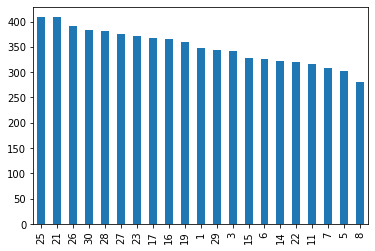

In [13]:
# subject
print(train["subject"].value_counts())
#print(train["subject"].value_counts(normalize="True"))
train["subject"].value_counts().plot(kind="bar")

No major imbalance in readings per subject

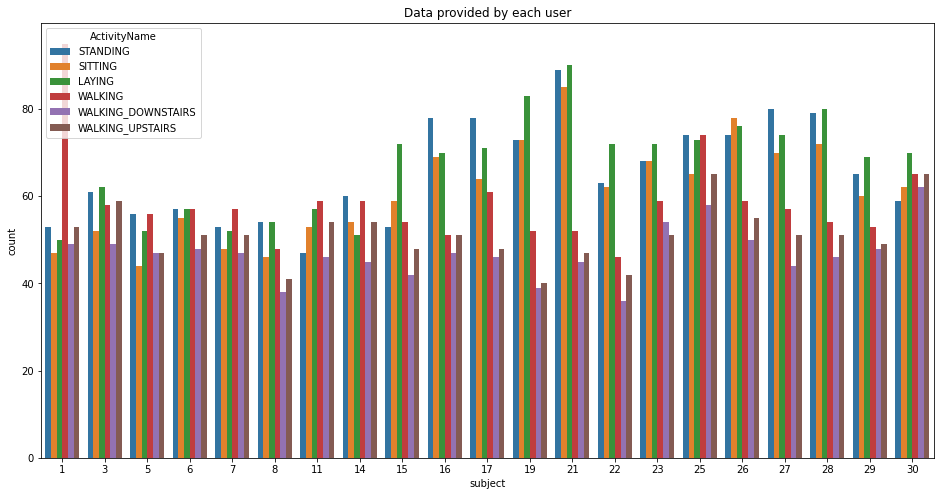

In [14]:
# class distribution per activity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title('Data provided by each user')
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64


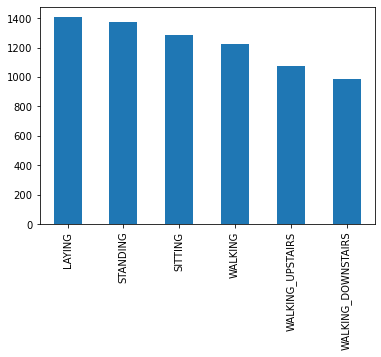

In [15]:
print(train["ActivityName"].value_counts())
train["ActivityName"].value_counts().plot(kind="bar")

No major imbalance in readings per type of activity

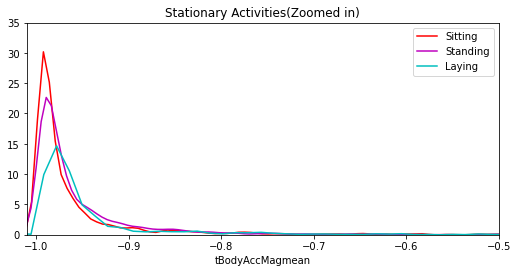

In [16]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df_walk = train[train['Activity']==1]
df_walk_up = train[train['Activity']==2]
df_walk_down = train[train['Activity']==3]
df_sit = train[train['Activity']==4]
df_stand = train[train['Activity']==5]
df_lay = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df_sit['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df_stand['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df_lay['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend()
plt.tight_layout()


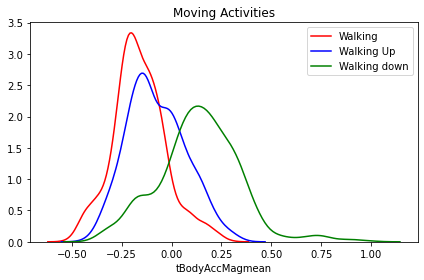

In [17]:
plt.title('Moving Activities')
sns.distplot(df_walk['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df_walk_up['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df_walk_down['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend()
plt.tight_layout()


<h2>Feature Visualization</h2>

In [18]:
# we have 561 dim expert engineered features
# map 561 dim to 2 dim using TSNE

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# performs t-sne
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')




performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.251s...
[t-SNE] Computed neighbors for 7352 samples in 32.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 124.7262268, gradient norm = 0.0286754 (50 iterations in 1.310s)
[t-SNE] Iteration 100: error = 107.2274323, gradient norm = 0.0268980 (50 iterations in

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


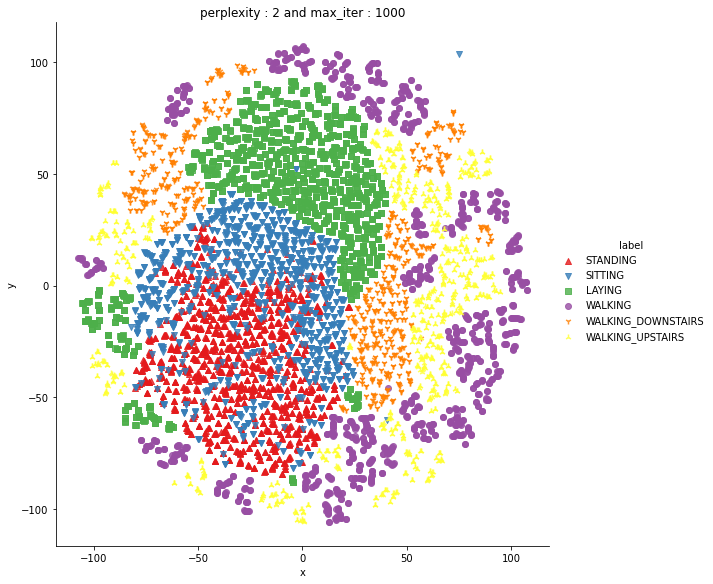

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.254s...
[t-SNE] Computed neighbors for 7352 samples in 33.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.039s
[t-SNE] Iteration 50: error = 114.0671844, gradient norm = 0.0223153 (50 iterations in 1.338s)
[t-SNE] Iteration 100: error = 97.6246033, gradient norm = 0.0160083 (50 iteratio

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


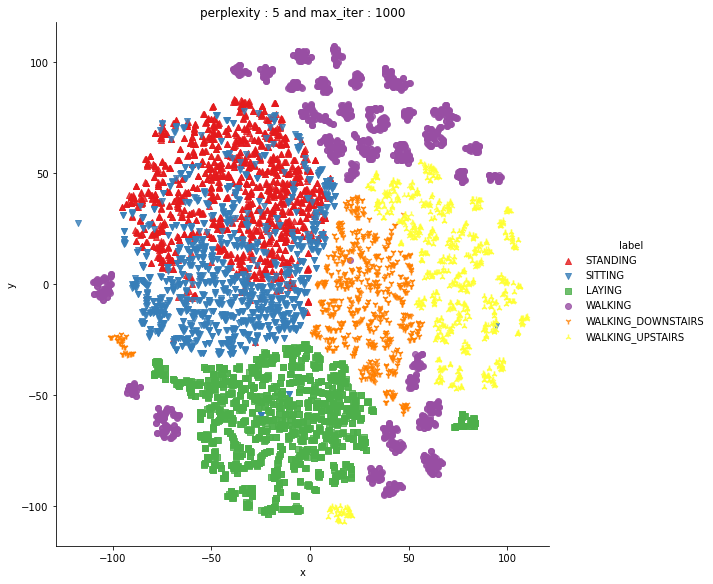

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.246s...
[t-SNE] Computed neighbors for 7352 samples in 33.798s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 105.7940140, gradient norm = 0.0194911 (50 iterations in 1.239s)
[t-SNE] Iteration 100: error = 90.7116776, gradient norm = 0.0098740 (50 iterati

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


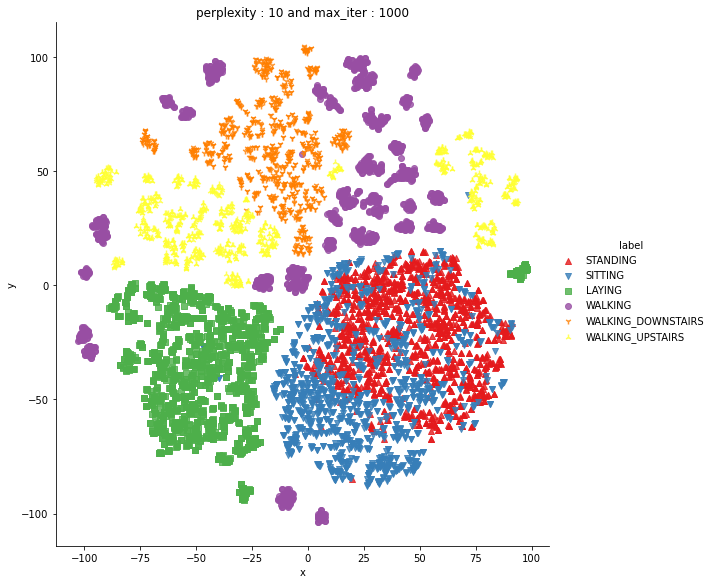

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.247s...
[t-SNE] Computed neighbors for 7352 samples in 35.684s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.137s
[t-SNE] Iteration 50: error = 97.7291260, gradient norm = 0.0157343 (50 iterations in 1.178s)
[t-SNE] Iteration 100: error = 83.9088974, gradient norm = 0.0069019 (50 iteratio

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


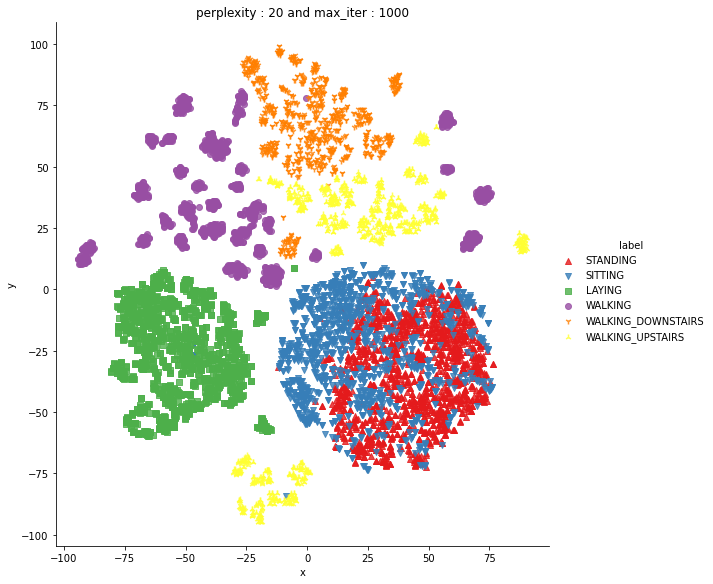

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.251s...
[t-SNE] Computed neighbors for 7352 samples in 35.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.336s
[t-SNE] Iteration 50: error = 86.4407349, gradient norm = 0.0197908 (50 iterations in 1.415s)
[t-SNE] Iteration 100: error = 75.9140472, gradient norm = 0.0066295 (50 iterati

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


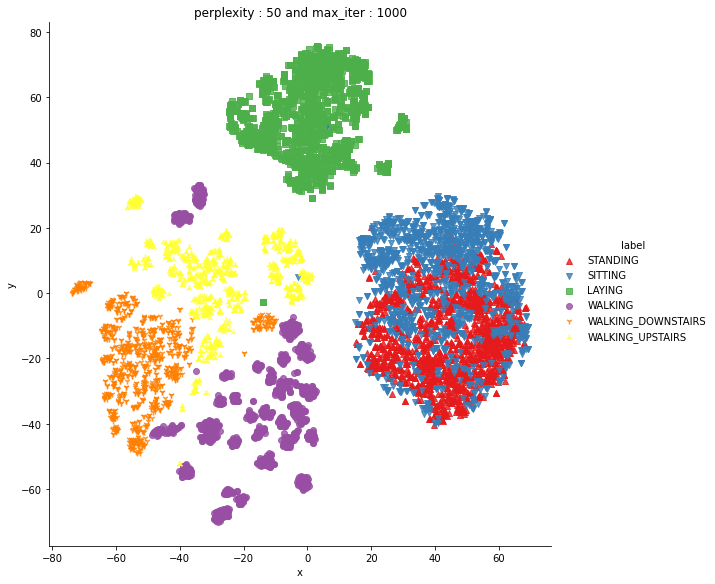

Done


In [19]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In each of the above plots (with different values of perplexity) we observe that there is considerable overlap bw Standing and Sitting labels - they may be tricky to classify. Rest of the labels
appear to be fairly separable

<h2>ML Models</h2>

In [20]:
#train prep

In [21]:
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,ActivityName,Activity
121,0.308305,-0.019883,-0.160447,-0.439,0.003313,-0.208538,-0.485981,-0.063575,-0.223715,-0.180948,...,-0.237141,-0.583154,0.121184,-0.14003,-0.780883,0.248986,0.031598,1,WALKING,1


In [22]:
X_train = train.drop(train.columns[[561, 562, 563]], axis = 1)
X_train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
88,0.205307,-0.008508,-0.119647,-0.260705,0.027917,-0.226546,-0.316776,-0.038487,-0.251814,-0.068583,...,0.118514,-0.013689,-0.317316,0.834771,-0.849025,-0.357328,-0.170313,-0.765488,0.258193,0.043972


In [23]:
y_train = train["Activity"]
print(y_train.shape)

print(X_train.shape)

(7352,)
(7352, 561)


In [24]:
# test prep

X_test = test.drop(test.columns[[561, 562, 563]], axis = 1)
X_test.sample()

y_test = test["Activity"]
print(y_test.shape)

print(X_test.shape)

(2947,)
(2947, 561)


<b>Utility functions</b>

In [25]:
# to plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
# function that takes model as input and returns pedictions + generates accuracy score, plots confusion matrix

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('Accuracy')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('Confusion Matrix')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('Classifiction Report')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

<h2>1.1 Logistic Regression with Grid Search CV</h2>

In [27]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:48.861994


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013499


Accuracy
---------------------

    0.9626739056667798


Confusion Matrix
--------------------

 [[493   0   3   0   0   0]
 [ 23 447   1   0   0   0]
 [  3   9 408   0   0   0]
 [  0   3   0 433  54   1]
 [  1   0   0  12 519   0]
 [  0   0   0   0   0 537]]


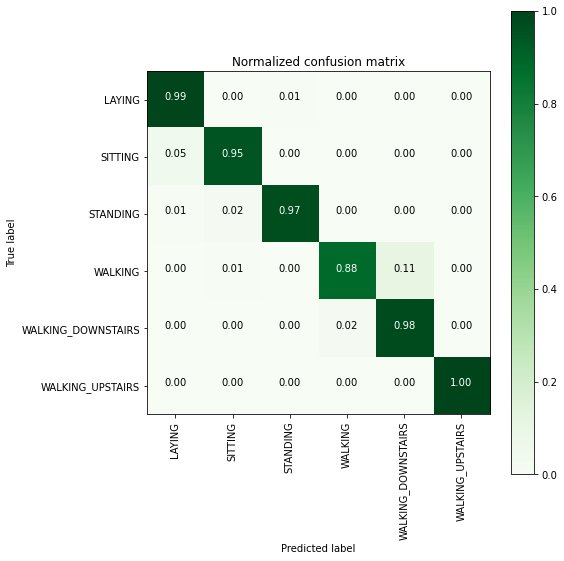

Classifiction Report
-------------------------
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.97      0.95      0.96       471
           3       0.99      0.97      0.98       420
           4       0.97      0.88      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [28]:
# start Grid search

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(max_iter=7700)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [29]:
# best model parameters

model = log_reg_grid
print('Best Estimators{}\n'.format(model.best_estimator_))
print('Parameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
print('Total numbre of cross validation sets: {}\n'.format(model.n_splits_))
print('Average Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


Best EstimatorsLogisticRegression(C=10, max_iter=7700)

Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

Total numbre of cross validation sets: 3

Average Cross Validate scores of best estimator : 

	0.9416508047527458



<h2>1.2 Linear SVC + Grid Search</h2>

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:30.163780


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013987


Accuracy
---------------------

    0.9667458432304038


Confusion Matrix
--------------------

 [[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  3   5 412   0   0   0]
 [  0   3   0 428  58   2]
 [  1   0   0   9 522   0]
 [  0   0   0   0   0 537]]


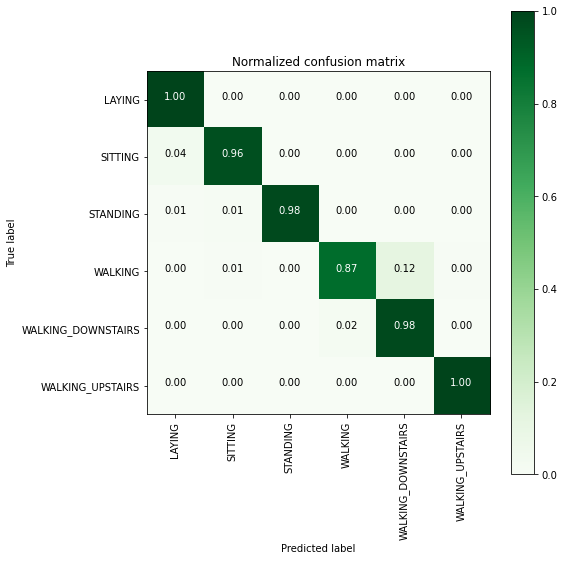

Classifiction Report
-------------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [30]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005, max_iter=7700)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [31]:
# best model parameters
model = lr_svc_grid
print('Best Estimators{}\n'.format(model.best_estimator_))
print('Parameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
print('Total numbre of cross validation sets: {}\n'.format(model.n_splits_))
print('Average Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


Best EstimatorsLinearSVC(C=0.5, max_iter=7700, tol=5e-05)

Parameters of best estimator : 

	{'C': 0.5}

Total numbre of cross validation sets: 5

Average Cross Validate scores of best estimator : 

	0.9420644015594



In [32]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.67%       3.325% 


<h2><b>Part 2. Performance of Deep Learning Model - LSTM on Raw Time Series Data</b></h2>

In [33]:
# data prep

train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,ActivityName,Activity
4365,0.076304,0.006225,-0.074243,0.25907,0.303205,-0.102419,0.165417,0.254295,-0.17881,0.484302,...,0.952199,0.472472,-0.939282,0.495857,-0.612771,0.333291,0.145715,21,WALKING_DOWNSTAIRS,3


<b>2.1 Load data</b>

In [59]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}


In [45]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]


In [46]:
# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            pd.read_csv(filename, delim_whitespace=True, header=None).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [47]:
def load_y(subset):
    """
    return One Hot Encoded labels
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]

    return pd.get_dummies(y).to_numpy()

In [48]:
# load data
X_train, X_test = load_signals('train'), load_signals('test')
Y_train, Y_test = load_y('train'), load_y('test')

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7352, 128, 9)
(7352, 6)
(2947, 128, 9)
(2947, 6)


In [49]:
#!pip install keras
#!pip install tensorflow

In [50]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [ ]:
# init hyperparameters
epochs = 20
batch_size = 32
n_hidden = 32

In [52]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(set([tuple(category) for category in Y_train]))

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [53]:
# LSTM architecture

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [54]:
# specify optimizer and loss function
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
#! pwd

In [ ]:
# train

model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

In [65]:
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)]) 
Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])
pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,27,0,0,0
SITTING,0,374,116,0,1,0
STANDING,0,71,461,0,0,0
WALKING,0,2,3,459,4,28
WALKING_DOWNSTAIRS,0,0,0,3,416,1
WALKING_UPSTAIRS,0,9,8,22,8,424


In [66]:
model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 6ms/step - loss: 0.2898 - accuracy: 0.8972


[0.2897908687591553, 0.8971835970878601]

# Conclusion

Achieved an accuracy of 89.72% with a simple LSTM architecture applied on raw time series data w/o any feature engineerinig. This reflects the potential of DL models. Following steps may be taken to further improve this score:
1. Create more training data
2. Hyper-parameter tuning